In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
alpha_vals = np.array([0.1, 0.05, 0.01])
p1=np.array([0.2, 0.4, 0.7])
p2=np.array([0.45, 0.5, 0.58])
n_vals=np.array([20, 100, 1000, 5000])

In [3]:
def ub(num_tosses, num_heads, alpha):
    exp = np.log(alpha)
    exp = -exp
    exp = exp/(2*num_tosses)
    y0 = np.sqrt(exp)
    return num_heads/num_tosses + y0

In [4]:
def choose_coin(ubs):
    return np.random.choice(np.flatnonzero(ubs == ubs.max()))

In [5]:
def simulation(p_vals, n, alpha):
    ubs=np.ones(3)
    num_heads=np.zeros(3)
    num_tosses=np.zeros(3)
    for i in range(n):
        c = choose_coin(ubs)
        num_heads[c] += np.random.choice([0, 1], p=[1-p_vals[c], p_vals[c]])
        num_tosses[c]+=1
        ubs = ub(num_tosses, num_heads, alpha)
        ubs[np.isnan(ubs)]=1
    return ubs, num_heads, num_tosses

In [6]:
def run(iters=100):
    for n in n_vals:
        for alpha in alpha_vals:
            meanh1=0
            meanh2=0
            meant1=0
            meant2=0
            for _ in range(iters):
                ubs1, nh1, nt1 = simulation(p1, n, alpha)
                ubs2, nh2, nt2 = simulation(p2, n, alpha)
                meanh1+=nh1.sum()
                meanh2+=nh2.sum()
                meant1+=nt1[2]
                meant2+=nt2[2]
            print(n, alpha, meanh1/iters, meanh2/iters, meant1/iters, meant2/iters)

In [7]:
run(100)

<ipython-input-3-1a7933f922dc>:4: RuntimeWarning: divide by zero encountered in true_divide
  exp = exp/(2*num_tosses)
<ipython-input-3-1a7933f922dc>:6: RuntimeWarning: invalid value encountered in true_divide
  return num_heads/num_tosses + y0


20 0.1 11.25 10.6 12.86 8.91
20 0.05 11.42 10.74 13.4 8.83
20 0.01 11.28 10.17 13.53 7.18
100 0.1 64.27 54.29 85.25 52.36
100 0.05 63.67 53.11 83.88 53.37
100 0.01 63.8 53.52 81.27 49.95
1000 0.1 692.2 563.69 980.26 814.05
1000 0.05 693.39 559.58 981.65 790.42
1000 0.01 690.84 559.46 971.5 786.52
5000 0.1 3492.2 2876.7 4983.02 4736.12
5000 0.05 3491.11 2882.5 4977.56 4804.65
5000 0.01 3486.45 2870.49 4968.73 4672.07


In [8]:
def simulation_1(p_vals, n, alpha):
    ubs=np.ones(3)
    num_heads=np.zeros(3)
    num_tosses=np.zeros(3)
    plot_pts=np.zeros((3, n))
    for i in range(n):
        c = choose_coin(ubs)
        num_heads[c] += np.random.choice([0, 1], p=[1-p_vals[c], p_vals[c]])
        num_tosses[c]+=1
        plot_pts[:, i] = num_heads/i
        ubs = ub(num_tosses, num_heads, alpha)
        ubs[np.isnan(ubs)]=1
    return plot_pts

In [22]:
def run_1(iters=100):
    pp1=[]
    pp2=[]
    n=5000
    for alpha in alpha_vals:
        plot_pts1=np.zeros((3, n))
        plot_pts2=np.zeros((3, n))
        for _ in range(iters):
            plot_pts1 += simulation_1(p1, n, alpha)
            plot_pts2 += simulation_1(p2, n, alpha)
        plot_pts1/=iters
        plot_pts2/=iters
        pp1.append(plot_pts1)
        pp2.append(plot_pts2)
    return pp1, pp2

In [29]:
pp1, pp2 = run_1(100)

<ipython-input-8-3f45c22ea573>:10: RuntimeWarning: divide by zero encountered in true_divide
  plot_pts[:, i] = num_heads/i
<ipython-input-8-3f45c22ea573>:10: RuntimeWarning: invalid value encountered in true_divide
  plot_pts[:, i] = num_heads/i
<ipython-input-3-1a7933f922dc>:4: RuntimeWarning: divide by zero encountered in true_divide
  exp = exp/(2*num_tosses)
<ipython-input-3-1a7933f922dc>:6: RuntimeWarning: invalid value encountered in true_divide
  return num_heads/num_tosses + y0


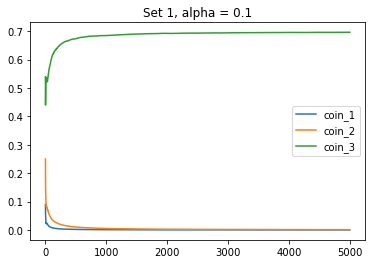

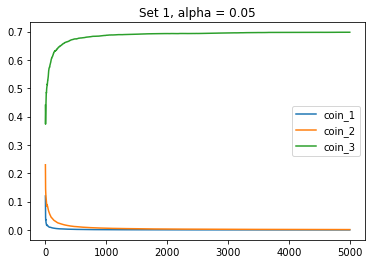

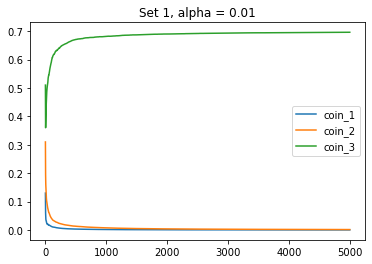

In [34]:
for j, pp in enumerate(pp1):
    for i in range(3):
        plt.plot(pp[i], label="coin_"+str(i+1))
    plt.title("Set 1, alpha = "+str(alpha_vals[j]))
    plt.savefig("Set 1, alpha = "+str(alpha_vals[j])+".png")
    plt.legend()
    plt.show()

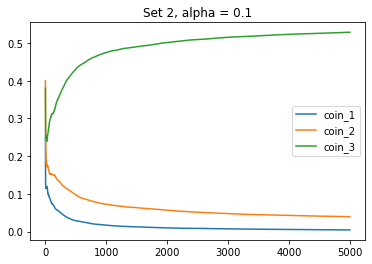

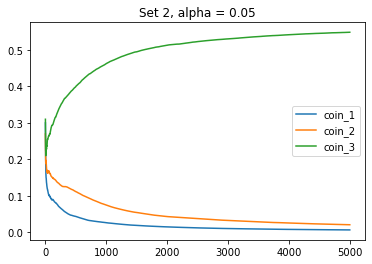

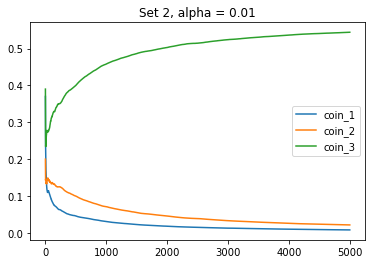

In [35]:
for j, pp in enumerate(pp2):
    for i in range(3):
        plt.plot(pp[i], label="coin_"+str(i+1))
    plt.title("Set 2, alpha = "+str(alpha_vals[j]))
    plt.savefig("Set 2, alpha = "+str(alpha_vals[j])+".png")
    plt.legend()
    plt.show()